Source: [Google Developers Course](https://developers.google.com/machine-learning/recommendation/overview/candidate-generation)

## Candidate Generation Overview

Candidate generation is the first stage of recommendation. Given a query (the information used by the system to make recommendations), the system generates a set of relevant candidates. The following table shows two common candidate generation approaches:

| Type | Definition | Example |
|---|---|---|
| content-based filtering | Uses similarity between items to recommend items similar to what the user likes. | If user A watches two cute cat videos, then the system can recommend cute animal videos to that user. |
| collaborative filtering | Uses similarities between queries and items simultaneously to provide recommendations. | If user A is similar to user B, and user B likes video 1, then the system can recommend video 1 to user A (even if user A hasn’t seen any videos similar to video 1). |

## Embedding Space

Both content-based and collaborative filtering map each item and each query (or context) to an embedding vector in a common embedding space $E=\mathbb{R}^d$. The notation $E=\mathbb{R}^d$ means that $E$ is a vector space over the real numbers $\mathbb{R}$, and the dimension of this vector space is $d$. In other words, $E$ consists of all $d$-dimensional vectors with real-valued components.

Each vector in $E$ can be written as a column vector with $d$ rows, such as:

$$\mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_d \end{bmatrix}$$

where $x_i \in \mathbb{R}$ for $i = 1, 2, \ldots, d$. 


Typically, the embedding space is low-dimensional (that is, $d$ is much smaller than the size of the corpus), and captures some latent (e.g. PCA) structure of the item or query set. Similar items, such as YouTube videos that are usually watched by the same user, end up close together in the embedding space. The notion of "closeness" is defined by a similarity measure.

## Similarity Measure

A similarity measure is a function $s: E \times E \rightarrow \mathbb{R}$ that takes a pair of embeddings and returns a scalar measuring their similarity. The embeddings can be used for candidate generation as follows: 

> Given a query embedding $q \in E$, the system looks for item embeddings $x \in E$ that are close to $q$, that is, embeddings with high similarity $s(q, x)$. Note that $q$ and $x$ are $d$-dimensional vectors if the embedding space is $E=\mathbb{R}^d$.

To determine the degree of similarity, most recommendation systems rely on one or more of the following:

- cosine
- dot product
- Euclidean distance

### Cosine as a Similarity Measure

This is simply the cosine of the angle between the two vectors, $s(q, x)=\cos (q, x)$.

### Dot Product as a Similarity Measure

The dot product of two vectors is $s(q, x)=\langle q, x\rangle=\sum_{i=1}^d q_i x_i$. It is also given by $s(q, x)=\|x\|\|q\| \cos (q, x)$ (the cosine of the angle multiplied by the product of norms). Thus, if the embeddings are normalized to unit norm, then dot-product and cosine coincide. This follows from:

$$s(q, x)=\|x\|\|q\| \cos (q, x)=(1)(1)\cos (q, x)=\cos (q, x)$$

### Euclidean distance

This is the usual distance in Euclidean space, $s(q, x)=\|q-x\|=\left[\sum_{i=1}^d\left(q_i-x_i\right)^2\right]^{\frac{1}{2}}$. *A smaller distance means higher similarity*. Note that when the embeddings are normalized to unit norm, the squared Euclidean distance coincides with the dot product (and cosine) up to a constant, since in that case $\frac{1}{2}\|q-x\|^2=1-\langle q, x\rangle$.

## Comparing Similarity Measures

Consider the example in the figure. The black vector illustrates the query embedding used by the recommendation system to make recommendations--- user info, context, time of day, etc. The other three embedding vectors (Item A, Item B, Item C) represent candidate items. Depending on the similarity measure used, the ranking of the items can be different.

<center> 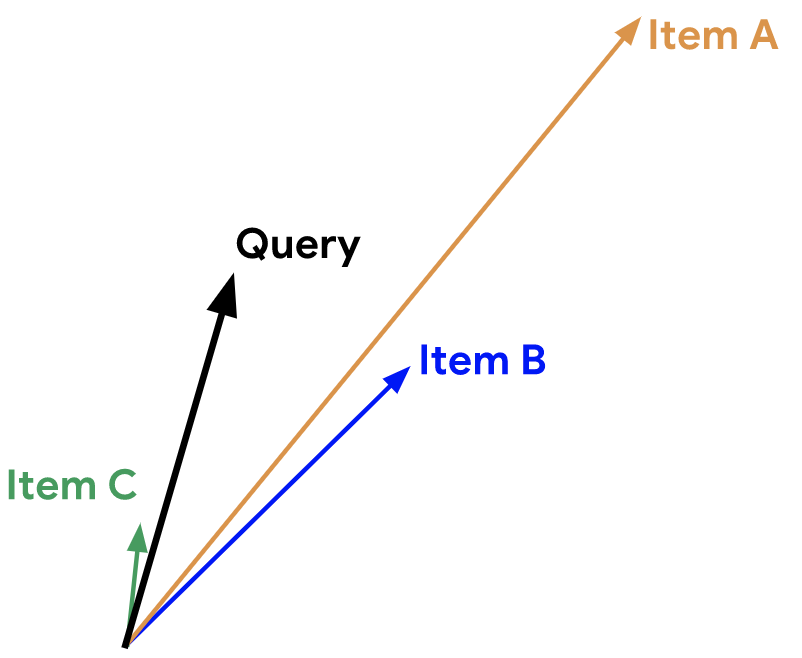 </center> 

Item A has the largest norm, and is ranked higher according to the dot-product. 

Item C has the smallest angle with the query, and is thus ranked first according to the cosine similarity. 

Item B is physically closest to the query so Euclidean distance favors it.

### Which Similarity Measure to Choose?

Compared to the cosine, the dot product similarity is sensitive to the norm of the embedding. That is, the larger the norm of an embedding, the higher the similarity (for items with an acute angle) and the more likely the item is to be recommended. This can affect recommendations as follows:

- Items that appear very frequently in the training set (for example, popular YouTube videos) tend to have embeddings with large norms. If capturing popularity information is desirable, then we should prefer dot product. However, if we are not careful, the popular items may end up dominating the recommendations. In practice, we can use other variants of similarity measures that put less emphasis on the norm of the item. For example, define $s(q, x)=\|q\|^\alpha\|x\|^\alpha \cos (q, x)$ for some $\alpha \in(0,1)$.
  
- Items that appear very rarely may not be updated frequently during training. Consequently, if they are initialized with a large norm, the system may recommend rare items over more relevant items. To avoid this problem, be careful about embedding initialization, and use appropriate regularization.